3.25 lc-daily union-find /  dfs

In [2]:
from typing import List
from collections import Counter

In [3]:
#unon-find
# 86.48% time   90.4% space

class Solution:
    def countPairs(self, n: int, edges: List[List[int]]) -> int:

        parent = [i for i in range(n)]
        rank = [1 for _ in range(n)]

        def find(n:int)->int:
            while parent[n] != n:
                parent[n] = parent[parent[n]]
                n = parent[n]
            return n

        def union(i:int,j:int):
            rooti = find(i)
            rootj = find(j)
            if rooti == rootj:
                return
            if rank[rooti]<rank[rootj]:
                parent[rootj] = rooti
            elif rank[rooti]>rank[rootj]:
                parent[rooti] = rootj
            else:
                parent[rootj] = rooti
                rank[rooti] += 1

        for [i,j] in edges:
            union(i,j)

        groups = Counter([find(i) for i in range(n)])
        groupCounts = list(groups.values())
        rlt = 0

        start_group_count = groupCounts[0]
        for i in range(1,len(groupCounts)):
            rlt += start_group_count * groupCounts[i]
            start_group_count += groupCounts[i]

        return rlt

In [4]:
#dfs
class Solution:
    def countPairs(self, n: int, edges: List[List[int]]) -> int:
        
        def dfs(i:int,g:List[List[int]], visited:List[boolean]) -> int:
            visited[i] = True
            size = 1
            for j in g[i]:
                if not visited[j]:
                    size += dfs(j,g,visited)
            return size
        
        g = [[] for i in range(n)]
        for i,j in edges:
            g[i].append(j)
            g[j].append(i)
        visited = [False]*n
        sizes = [0]*n
        for i in range(n):
            if not visited[i]:
                sizes[i] = self.dfs(i,g,visited)
            
        #same as above
        rlt = 0
        sum = 0
        for size in sizes:
            rlt += sum*size
            sum += size
        
        return rlt


3. bfs 优化
上面两个的计算都是，全统计出来后，相乘再相加

反向：
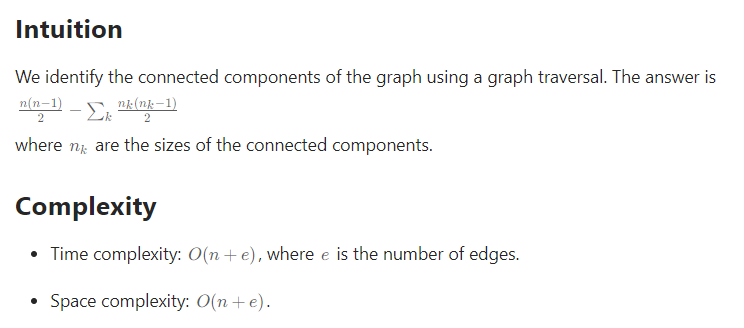

In [ ]:
# 98.22% time, 74.38% space
class Solution_bfs_faster:
    
    def countPairs(self, n: int, edges: List[List[int]]) -> int:
        # Build the adjacency list of the graph
        g =[[] for _ in range(n)]
        for i,j in edges:
            g[i].append(j)
            g[j].append(i)
        visited = [False]*n

        rlt = n*n-n # /2在最后

        for i in range(n):
            if visited[i]:
                continue
            else:
                visited[i] = True
                size_temp = 0
                que = [i] #crate queue
                while que:
                    size_temp += 1
                    #临近点如果没visited过，加入que
                    adj_node = que.pop()
                    for j in g[adj_node]:
                        if not visited[j]:
                            visited[j] = True
                            que.append(j)
                rlt -= size_temp*(size_temp-1)
        
        return rlt>>1 #公式，整体/2


You are given an integer n. There is an undirected graph with n nodes, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

Return the number of pairs of different nodes that are unreachable from each other.

 

Example 1:
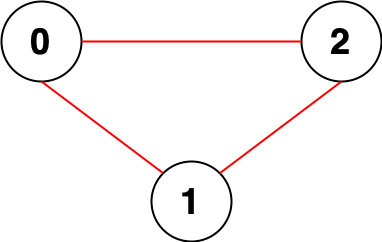 </br>

Input: n = 3, edges = [[0,1],[0,2],[1,2]]
Output: 0
Explanation: There are no pairs of nodes that are unreachable from each other. Therefore, we return 0.


Example 2:
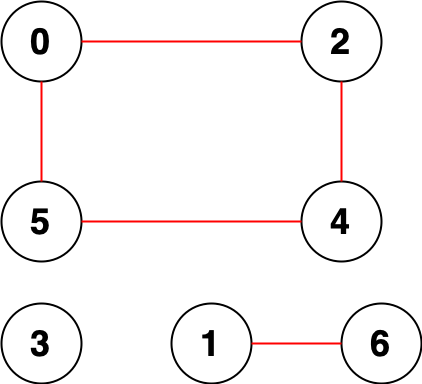 </br>
Input: n = 7, edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]
Output: 14
Explanation: There are 14 pairs of nodes that are unreachable from each other:
[[0,1],[0,3],[0,6],[1,2],[1,3],[1,4],[1,5],[2,3],[2,6],[3,4],[3,5],[3,6],[4,6],[5,6]].
Therefore, we return 14.
 

Constraints:

1 <= n <= 105
0 <= edges.length <= 2 * 105
edges[i].length == 2
0 <= ai, bi < n
ai != bi
There are no repeated edges.